<a href="https://colab.research.google.com/github/pavi2006thara/phase2/blob/main/Source_code_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving assessments.csv (1).csv to assessments.csv (1).csv


In [ ]:

import pandas as pd

df = pd.read_csv('assessments.csv.csv')
df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,students scores
0,AAA,2013J,1752,TMA,19.0,10.0,pass
1,AAA,2013J,1753,TMA,54.0,20.0,pass
2,AAA,2013J,1754,TMA,117.0,20.0,fail
3,AAA,2013J,1755,TMA,166.0,20.0,pass
4,AAA,2013J,1756,TMA,215.0,30.0,fail


students_scores
pass     100
fail      88
fail       7
Name: count, dtype: int64
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      1.00      1.00         1
           2       0.95      0.95      0.95        19

    accuracy                           0.95        39
   macro avg       0.96      0.96      0.96        39
weighted avg       0.95      0.95      0.95        39

Accuracy: 0.9487179487179487


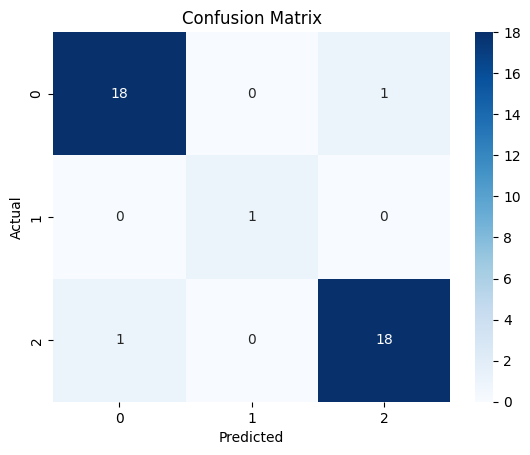

In [ ]:

# =====================================
# IMPORT LIBRARIES
# =====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# =====================================
# LOAD DATA
# =====================================
df = pd.read_csv("assessments.csv.csv")

# =====================================
# DATA CLEANING
# =====================================
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop rows with missing values
df = df.dropna()

# Confirm target classes
print(df['students_scores'].value_counts())

# =====================================
# ENCODE CATEGORICAL VARIABLES
# =====================================
le = LabelEncoder()
df['students_scores'] = le.fit_transform(df['students_scores'])  # pass = 1, fail = 0

for col in ['code_module', 'code_presentation', 'assessment_type']:
    df[col] = le.fit_transform(df[col])

# =====================================
# FEATURE SELECTION
# =====================================
X = df.drop(columns=['students_scores'])
y = df['students_scores']

# =====================================
# SPLIT DATA
# =====================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =====================================
# MODEL TRAINING
# =====================================
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# =====================================
# EVALUATION
# =====================================
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()